## Parte 2 - Análisis del discurso

Se hizo el análsis de discurso a 16000 items de cada corpus; de esos items 6747 del corpus con diagnostico negativo, y 6236 con diagnistico positivo, son analizables.

Se recopilan los arboles de coherencia usando CODRA, para cada uno de los items del corpus.

In [17]:
import os
import docker
import math
import signal
import multiprocessing
import time
import pickle5 as pickle
import numpy as np

client = docker.from_env()
from IPython.display import clear_output


class TimeoutException(Exception): 
    pass

def timeout_handler(signum, frame): 
    raise TimeoutException

signal.signal(signal.SIGALRM, timeout_handler)


def coherence(row):

    if((pd.isna(row["tree"]))):
        os.system("echo '"+row['text']+"' > input.txt")
        os.system("cp input.txt /Users/raulbarrantes/tmp/")
        clear_output(wait=True)
        print(row.name)
        signal.alarm(360)
        try:
            return client.containers.run("nlpbox/codra", "/tmp/input.txt",  tty=True, volumes={'/Users/raulbarrantes/tmp': {'bind': '/tmp/'}},)
        except TimeoutException: 
            return "No"
        except:
            return "No"
    else:
        return row["tree"]
    
def coherenceChar(row):
    os.system("echo '"+row['text']+"' > input.txt")
    os.system("cp input.txt /Users/raulbarrantes/tmp/")
    clear_output(wait=True)
    print(row.name)
    signal.alarm(360)
    try:
        return client.containers.run("nlpbox/codra", "/tmp/input.txt",  tty=True, volumes={'/Users/raulbarrantes/tmp': {'bind': '/tmp/'}},)
    except TimeoutException: 
        return "No"
    except:
        return "No"


In [ ]:
for n in range(12550, 14000, 50):
    dfNegative['tree'] = dfNegative.iloc[0:n+1].apply(coherence,axis=1)
    with open('dfNegative.pickle', 'wb') as handle:
        pickle.dump(dfNegative, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [4]:
for n in range(0, 90022, 50):
    dfPositive['tree'] = dfPositive.iloc[0:n+1].apply(coherence,axis=1)
    with open('dfPositive.pickle', 'wb') as handle:
        pickle.dump(dfPositive, handle, protocol=pickle.HIGHEST_PROTOCOL)

16000


ERROR:root:Invalid alias: The name clear can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name more can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name less can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name man can't be aliased because it is another magic command.


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [30]:
dfNegative = pd.read_json('dfNegative.json')
dfPositive = pd.read_json('dfPositive.json')

Se filtan los datos que pueden ser analizados.

In [31]:
dfPositive = dfPositive.dropna()
dfPositive = dfPositive[dfPositive['tree']!='No']
dfPositive = dfPositive[dfPositive['tree'].str.contains("Root").fillna(False)]
dfPositive

,date,info,text,diagnose,word_count_text,char_count_text,avg_word_text,stopwords_text,percentage_stopwords,tree
0,2015-05-04 07:25:36,reddit post,I go after what I want. Why should I wait for...,true,27,115,3.708333,10,37.037037,( Root (span 1 4)\r\n ( Nucleus (leaf 1) (rel...
3,2014-10-26 19:39:11,reddit post,My parents grew up here (New Holland). It's l...,true,32,176,5.000000,7,21.875000,( Root (span 1 6)\r\n ( Nucleus (span 1 5) (r...
10,2014-09-12 05:42:07,reddit post,Iowa State University Record high enrollment...,true,16,82,5.583333,3,18.750000,( Root (span 1 2)\r\n ( Nucleus (leaf 1) (rel...
11,2014-08-16 00:43:59,reddit post,"Michael Buble: ""Everything"" - he smiles when ...",true,23,114,4.600000,8,34.782609,( Root (span 1 2)\r\n ( Nucleus (leaf 1) (rel...
12,2014-08-15 21:30:47,reddit post,It is sturdy. Feels like something that would...,true,38,184,4.200000,15,39.473684,( Root (span 1 8)\r\n ( Nucleus (span 1 3) (r...
...,...,...,...,...,...,...,...,...,...,...
41098,2013-10-26 05:49:11,reddit post,could you tell me a bit about the course? wha...,true,25,121,4.409091,10,40.000000,( Root (span 1 4)\n ( Nucleus (leaf 1) (rel2p...
41099,2013-10-26 02:19:14,reddit post,anyone know of an light 100 or 200 level half...,true,38,211,5.117647,10,26.315789,( Root (span 1 3)\n ( Nucleus (span 1 2) (rel...
41100,2013-10-26 00:40:28,reddit post,just because he's sitting in a normal chair d...,true,43,236,4.850000,18,41.860465,( Root (span 1 7)\n ( Nucleus (span 1 3) (rel...
41103,2013-10-19 00:23:59,reddit post,any must reads that are rarely mentioned? i ...,true,42,233,5.052632,15,35.714286,( Root (span 1 6)\n ( Nucleus (span 1 2) (rel...


In [32]:
dfNegative = dfNegative.dropna()
dfNegative = dfNegative[dfNegative['tree']!='No']
dfNegative = dfNegative[dfNegative['tree'].str.contains("Root").fillna(False)]
dfNegative

,date,info,text,diagnose,word_count_text,char_count_text,avg_word_text,stopwords_text,percentage_stopwords,tree
2,2015-07-22 04:07:17,reddit post,My favorite snack (pickled herring + saltines),false,9,48,5.714286,0,0.000000,( Root (span 1 2)\r\n ( Nucleus (leaf 1) (rel...
3,2015-07-21 16:51:21,reddit post,I make curried butternut squash risotto. Fusi...,false,14,75,5.166667,1,7.142857,( Root (span 1 2)\r\n ( Nucleus (leaf 1) (rel...
4,2015-07-21 15:40:41,reddit post,"Bake like crazy. You can also freeze some, b...",false,39,191,4.250000,15,38.461538,( Root (span 1 2)\r\n ( Nucleus (leaf 1) (rel...
6,2015-07-19 17:31:54,reddit post,I've found it's also cheaper to buy blocks an...,false,31,146,4.000000,11,35.483871,( Root (span 1 5)\r\n ( Nucleus (span 1 2) (r...
10,2015-07-13 17:06:16,reddit post,"My orange boy is named Bill, after the Weasle...",false,24,113,4.090909,9,37.500000,( Root (span 1 5)\r\n ( Nucleus (span 1 2) (r...
...,...,...,...,...,...,...,...,...,...,...
55880,2015-03-30 03:45:22,reddit post,[ARE YOU TRYING TO KILL ME??] (https://www.go...,false,64,444,6.350000,21,32.812500,( Root (span 1 9)\n ( Nucleus (leaf 1) (rel2p...
55883,2015-03-30 03:10:55,reddit post,Wait *was*? So you saw it?? If you had to rat...,false,49,221,3.680851,20,40.816327,( Root (span 1 9)\n ( Nucleus (span 1 2) (rel...
55884,2015-03-30 03:02:31,reddit post,initially only available through Apple devic...,false,32,174,5.107143,10,31.250000,( Root (span 1 4)\n ( Nucleus (span 1 3) (rel...
55888,2015-03-19 00:12:33,reddit post,"""And as you can see, the blood stains *almost...",false,27,137,4.440000,9,33.333333,( Root (span 1 7)\n ( Nucleus (span 1 3) (rel...


## Generacion de archivos con datos no procesados

In [28]:
dfNegativeNo = pd.read_json('dfNegative.json')
dfNegativeNo = dfNegativeNo.dropna()
dfNegativeNo = dfNegativeNo[~dfNegativeNo['tree'].str.contains("Root").fillna(False)]
dfNegativeNo['tree'] =  np.nan
dfNegativeNo.to_json(r'dfNegativeNo.json')

In [27]:
dfPositiveNo = pd.read_json('dfPositive.json')
dfPositiveNo = dfPositiveNo.dropna()
dfPositiveNo = dfPositiveNo[~dfPositiveNo['tree'].str.contains("Root").fillna(False)]
dfPositiveNo['tree'] =  np.nan
dfPositiveNo.to_json(r'dfPositiveNo.json')

Se recopila la información generada por los análisis, primero se recopila el número de frases en una sentencia:

In [102]:
import re
def num_phrases(sentence):
    x = re.search(r"\( Root \(span 1 (\d)+", sentence)
    return int(x.group()[15:]) 

dfPositive['num_phrases'] = dfPositive['tree'].apply(lambda x: num_phrases(x))
dfNegative['num_phrases'] = dfNegative['tree'].apply(lambda x: num_phrases(x))


El número de frases de elaboración:

In [103]:
def num_elaboration(sentence):
    x  = re.findall(r"Elaboration", sentence)
    return len(x)

dfPositive['num_elaboration'] = dfPositive['tree'].apply(lambda x: num_elaboration(x))
dfNegative['num_elaboration'] = dfNegative['tree'].apply(lambda x: num_elaboration(x))


El número de frases de enablement:

In [104]:
def num_enablement(sentence):
    x  = re.findall(r"Enablement", sentence)
    return len(x)

dfPositive['num_enablement'] = dfPositive['tree'].apply(lambda x: num_enablement(x))
dfNegative['num_enablement'] = dfNegative['tree'].apply(lambda x: num_enablement(x))


El número de frases de contraste:

In [105]:
def num_contrast(sentence):
    x  = re.findall(r"Contrast", sentence)
    return len(x)

dfPositive['num_contrast'] = dfPositive['tree'].apply(lambda x: num_contrast(x))
dfNegative['num_contrast'] = dfNegative['tree'].apply(lambda x: num_contrast(x))


El número de hojas de núcleo:

In [106]:
def num_nucleus_leaf(sentence):
    x  = re.findall(r"\( Nucleus \(leaf.*\) \)\r\n", sentence)
    return len(x)

dfPositive['num_nucleus_leaf'] = dfPositive['tree'].apply(lambda x: num_nucleus_leaf(x))
dfNegative['num_nucleus_leaf'] = dfNegative['tree'].apply(lambda x: num_nucleus_leaf(x))


In [107]:
def num_satellite_leaf(sentence):
    x  = re.findall(r"\( Satellite \(leaf.*\) \)\r\n", sentence)
    return len(x)

dfPositive['num_satellite_leaf'] = dfPositive['tree'].apply(lambda x: num_satellite_leaf(x))
dfNegative['num_satellite_leaf'] = dfNegative['tree'].apply(lambda x: num_satellite_leaf(x))


In [108]:
def num_nucleus_span(sentence):
    x  = re.findall(r"\( Nucleus \(span", sentence)
    return len(x)

dfPositive['num_nucleus_span'] = dfPositive['tree'].apply(lambda x: num_nucleus_span(x))
dfNegative['num_nucleus_span'] = dfNegative['tree'].apply(lambda x: num_nucleus_span(x))


In [109]:
def num_satellite_span(sentence):
    x  = re.findall(r"\( Satellite \(span", sentence)
    return len(x)

dfPositive['num_satellite_span'] = dfPositive['tree'].apply(lambda x: num_satellite_span(x))
dfNegative['num_satellite_span'] = dfNegative['tree'].apply(lambda x: num_satellite_span(x))


## Estadísticas de análisis de coherencia

### Numero de frases

#### Conteo de las frases en el texto (de 1 a 20, sin contar los datos que están vacíos).

<BarContainer object of 20 artists>

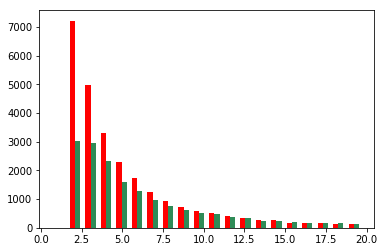

In [110]:
fig, ax = plt.subplots()

a_heights, a_bins = np.histogram(dfNegative['num_phrases'], bins=20, range=(1,20))
b_heights, b_bins = np.histogram(dfPositive['num_phrases'], bins=20, range=(1,20))

width = (a_bins[1] - a_bins[0])/3

ax.bar(a_bins[:-1], a_heights, width=width, facecolor='red')
ax.bar(b_bins[:-1]+width, b_heights, width=width, facecolor='seagreen')

#### Medias

In [111]:
dfPositive["num_phrases"].mean()

8.568160623182841

In [112]:
dfNegative["num_phrases"].mean()

6.248236742918984

#### Medianas

In [113]:
dfPositive["num_phrases"].median()

5.0

In [114]:
dfNegative["num_phrases"].median()

4.0

#### Porcentajes

In [115]:
dfPositive.loc[dfPositive['num_phrases'] > 10, 'num_phrases'] = "> 10"
dfNegative.loc[dfNegative['num_phrases'] > 10, 'num_phrases'] = "> 10"

##### Corpus Positivo

In [116]:
s = dfPositive.num_phrases
counts = s.value_counts()
percent = s.value_counts(normalize=True)
percent100 = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'counts': counts, 'per': percent, 'per100': percent100}).head(10)

,counts,per,per100
> 10,4130,0.226562,22.7%
2,3041,0.166822,16.7%
3,2964,0.162598,16.3%
4,2330,0.127818,12.8%
5,1606,0.088101,8.8%
6,1280,0.070218,7.0%
7,973,0.053376,5.3%
8,756,0.041472,4.1%
9,637,0.034944,3.5%
10,512,0.028087,2.8%


##### Corpus Negativo

In [117]:
s = dfNegative.num_phrases
counts = s.value_counts()
percent = s.value_counts(normalize=True)
percent100 = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'counts': counts, 'per': percent, 'per100': percent100}).head(10)

,counts,per,per100
2,7219,0.269396,26.9%
3,4983,0.185954,18.6%
> 10,3729,0.139157,13.9%
4,3309,0.123484,12.3%
5,2285,0.085271,8.5%
6,1742,0.065007,6.5%
7,1246,0.046498,4.6%
8,951,0.035489,3.5%
9,737,0.027503,2.8%
10,596,0.022241,2.2%


### Conteo de las frases de elaboración*

<BarContainer object of 20 artists>

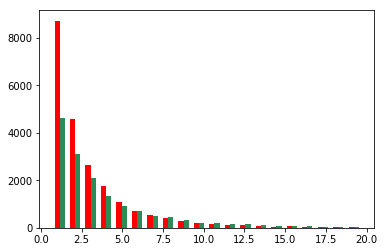

In [118]:
fig, ax = plt.subplots()

a_heights, a_bins = np.histogram(dfNegative['num_elaboration'], bins=20, range=(1,20))
b_heights, b_bins = np.histogram(dfPositive['num_elaboration'], bins=20, range=(1,20))

width = (a_bins[1] - a_bins[0])/3

ax.bar(a_bins[:-1], a_heights, width=width, facecolor='red')
ax.bar(b_bins[:-1]+width, b_heights, width=width, facecolor='seagreen')

#### Medias

In [119]:
dfPositive["num_elaboration"].mean()

3.314663448351528

In [120]:
dfNegative["num_elaboration"].mean()

2.5191999104377354

#### Medianas

In [121]:
dfPositive["num_elaboration"].median()

2.0

In [122]:
dfPositive["num_elaboration"].median()

2.0

#### Porcentajes

In [123]:
dfPositive.loc[dfPositive['num_elaboration'] > 10, 'num_elaboration'] = "> 10"
dfNegative.loc[dfNegative['num_elaboration'] > 10, 'num_elaboration'] = "> 10"

##### Corpus Positivo

In [124]:
s = dfPositive.num_elaboration
counts = s.value_counts()
percent = s.value_counts(normalize=True)
percent100 = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'counts': counts, 'per': percent, 'per100': percent100}).head(10)

,counts,per,per100
1,4631,0.254046,25.4%
2,3124,0.171375,17.1%
0,2833,0.155412,15.5%
3,2078,0.113994,11.4%
4,1351,0.074113,7.4%
> 10,1083,0.059411,5.9%
5,921,0.050524,5.1%
6,728,0.039936,4.0%
7,502,0.027539,2.8%
8,450,0.024686,2.5%


##### Corpus Negativo

In [125]:
s = dfNegative.num_elaboration
counts = s.value_counts()
percent = s.value_counts(normalize=True)
percent100 = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'counts': counts, 'per': percent, 'per100': percent100}).head(10)

,counts,per,per100
1,8719,0.325372,32.5%
0,5006,0.186812,18.7%
2,4594,0.171437,17.1%
3,2639,0.098481,9.8%
4,1748,0.065231,6.5%
5,1101,0.041087,4.1%
> 10,838,0.031272,3.1%
6,707,0.026384,2.6%
7,535,0.019965,2.0%
8,404,0.015076,1.5%


### Conteo de las frases de enablement*

<BarContainer object of 5 artists>

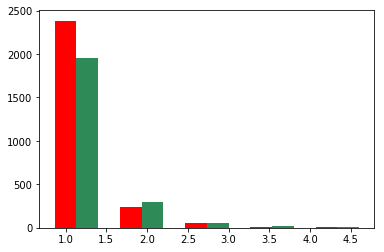

In [126]:
fig, ax = plt.subplots()

a_heights, a_bins = np.histogram(dfNegative['num_enablement'], bins=5, range=(1,5))
b_heights, b_bins = np.histogram(dfPositive['num_enablement'], bins=5, range=(1,5))

width = (a_bins[1] - a_bins[0])/3

ax.bar(a_bins[:-1], a_heights, width=width, facecolor='red')
ax.bar(b_bins[:-1]+width, b_heights, width=width, facecolor='seagreen')

#### Medias

In [127]:
dfPositive["num_enablement"].mean()

0.15458884195512645

In [128]:
dfNegative["num_enablement"].mean()

0.11527409784677389

#### Medianas

In [129]:
dfPositive["num_enablement"].median()

0.0

In [130]:
dfNegative["num_enablement"].median()

0.0

#### Porcentajes

In [131]:
dfPositive.loc[dfPositive['num_enablement'] > 10, 'num_enablement'] = "> 10"
dfNegative.loc[dfNegative['num_enablement'] > 10, 'num_enablement'] = "> 10"

##### Corpus Positivo

In [132]:
s = dfPositive.num_enablement
counts = s.value_counts()
percent = s.value_counts(normalize=True)
percent100 = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'counts': counts, 'per': percent, 'per100': percent100}).head(10)

,counts,per,per100
0,15898,0.872127,87.2%
1,1956,0.107302,10.7%
2,300,0.016457,1.6%
3,51,0.002798,0.3%
4,17,0.000933,0.1%
5,4,0.000219,0.0%
8,1,0.000055,0.0%
7,1,0.000055,0.0%
6,1,0.000055,0.0%


##### Corpus Negativo

In [133]:
s = dfNegative.num_enablement
counts = s.value_counts()
percent = s.value_counts(normalize=True)
percent100 = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'counts': counts, 'per': percent, 'per100': percent100}).head(10)

,counts,per,per100
0,24106,0.899578,90.0%
1,2383,0.088928,8.9%
2,241,0.008994,0.9%
3,54,0.002015,0.2%
5,6,0.000224,0.0%
4,5,0.000187,0.0%
6,2,0.000075,0.0%


### Conteo de las frases de contraste

<BarContainer object of 5 artists>

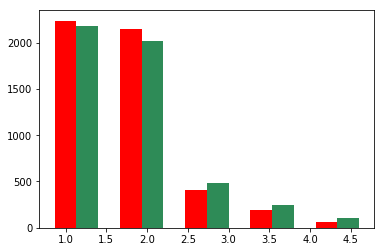

In [134]:
fig, ax = plt.subplots()

a_heights, a_bins = np.histogram(dfNegative['num_contrast'], bins=5, range=(1,5))
b_heights, b_bins = np.histogram(dfPositive['num_contrast'], bins=5, range=(1,5))

width = (a_bins[1] - a_bins[0])/3

ax.bar(a_bins[:-1], a_heights, width=width, facecolor='red')
ax.bar(b_bins[:-1]+width, b_heights, width=width, facecolor='seagreen')

#### Medias

In [135]:
dfPositive["num_contrast"].mean()

0.5613034176312469

In [136]:
dfNegative["num_contrast"].mean()

0.34884501996492145

#### Medianas

In [137]:
dfPositive["num_contrast"].median()

0.0

In [138]:
dfNegative["num_contrast"].median()

0.0

#### Porcentajes

In [139]:
dfPositive.loc[dfPositive['num_contrast'] > 10, 'num_contrast'] = "> 10"
dfNegative.loc[dfNegative['num_contrast'] > 10, 'num_contrast'] = "> 10"

##### Corpus Positivo

In [140]:
s = dfPositive.num_contrast
counts = s.value_counts()
percent = s.value_counts(normalize=True)
percent100 = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'counts': counts, 'per': percent, 'per100': percent100}).head(10)

,counts,per,per100
0,13048,0.715783,71.6%
1,2181,0.119645,12.0%
2,2020,0.110812,11.1%
3,487,0.026716,2.7%
4,244,0.013385,1.3%
5,107,0.005870,0.6%
6,66,0.003621,0.4%
7,33,0.001810,0.2%
10,19,0.001042,0.1%
8,14,0.000768,0.1%


##### Corpus Negativo

In [141]:
s = dfNegative.num_contrast
counts = s.value_counts()
percent = s.value_counts(normalize=True)
percent100 = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'counts': counts, 'per': percent, 'per100': percent100}).head(10)

,counts,per,per100
0,21682,0.809120,80.9%
1,2236,0.083442,8.3%
2,2143,0.079972,8.0%
3,413,0.015412,1.5%
4,187,0.006978,0.7%
5,61,0.002276,0.2%
6,42,0.001567,0.2%
7,14,0.000522,0.1%
9,7,0.000261,0.0%
8,6,0.000224,0.0%


### Conteo de las frases de núcleo

<BarContainer object of 10 artists>

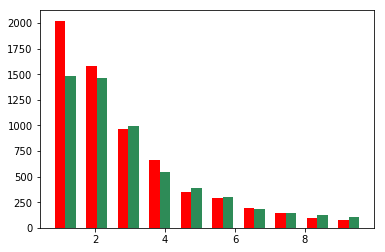

In [142]:
fig, ax = plt.subplots()

a_heights, a_bins = np.histogram(dfNegative['num_nucleus_leaf'], bins=10, range=(1,10))
b_heights, b_bins = np.histogram(dfPositive['num_nucleus_leaf'], bins=10, range=(1,10))

width = (a_bins[1] - a_bins[0])/3

ax.bar(a_bins[:-1], a_heights, width=width, facecolor='red')
ax.bar(b_bins[:-1]+width, b_heights, width=width, facecolor='seagreen')

#### Medias

In [143]:
dfPositive["num_nucleus_leaf"].mean()

1.4962971090021395

In [144]:
dfNegative["num_nucleus_leaf"].mean()

0.9119677575848043

#### Medianas

In [145]:
dfPositive["num_nucleus_leaf"].median()

0.0

In [146]:
dfNegative["num_nucleus_leaf"].median()

0.0

#### Porcentajes

In [147]:
dfPositive.loc[dfPositive['num_nucleus_leaf'] > 10, 'num_nucleus_leaf'] = "> 10"
dfNegative.loc[dfNegative['num_nucleus_leaf'] > 10, 'num_nucleus_leaf'] = "> 10"

##### Corpus Positivo

In [148]:
s = dfPositive.num_nucleus_leaf
counts = s.value_counts()
percent = s.value_counts(normalize=True)
percent100 = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'counts': counts, 'per': percent, 'per100': percent100}).head(10)

,counts,per,per100
0,11993,0.657908,65.8%
1,1485,0.081464,8.1%
2,1463,0.080257,8.0%
3,992,0.054419,5.4%
4,546,0.029952,3.0%
> 10,515,0.028252,2.8%
5,385,0.021120,2.1%
6,299,0.016402,1.6%
7,182,0.009984,1.0%
8,141,0.007735,0.8%


##### Corpus Negativo

In [149]:
s = dfNegative.num_nucleus_leaf
counts = s.value_counts()
percent = s.value_counts(normalize=True)
percent100 = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'counts': counts, 'per': percent, 'per100': percent100}).head(10)

,counts,per,per100
0,20050,0.748218,74.8%
1,2022,0.075456,7.5%
2,1579,0.058925,5.9%
3,962,0.035900,3.6%
4,662,0.024704,2.5%
> 10,371,0.013845,1.4%
5,350,0.013061,1.3%
6,293,0.010934,1.1%
7,191,0.007128,0.7%
8,149,0.005560,0.6%


### Conteo de las frases de satelite

<BarContainer object of 10 artists>

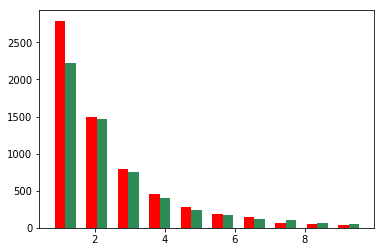

In [150]:
fig, ax = plt.subplots()

a_heights, a_bins = np.histogram(dfNegative['num_satellite_leaf'], bins=10, range=(1,10))
b_heights, b_bins = np.histogram(dfPositive['num_satellite_leaf'], bins=10, range=(1,10))

width = (a_bins[1] - a_bins[0])/3

ax.bar(a_bins[:-1], a_heights, width=width, facecolor='red')
ax.bar(b_bins[:-1]+width, b_heights, width=width, facecolor='seagreen')

#### Medias

In [151]:
dfPositive["num_satellite_leaf"].mean()

0.9416863239892479

In [152]:
dfNegative["num_satellite_leaf"].mean()

0.6130910176512296

#### Medianas

In [153]:
dfPositive["num_satellite_leaf"].median()

0.0

In [154]:
dfNegative["num_satellite_leaf"].median()

0.0

#### Porcentajes

In [155]:
dfPositive.loc[dfPositive['num_satellite_leaf'] > 10, 'num_satellite_leaf'] = "> 10"
dfNegative.loc[dfNegative['num_satellite_leaf'] > 10, 'num_satellite_leaf'] = "> 10"

##### Corpus Positivo

In [156]:
s = dfPositive.num_satellite_leaf
counts = s.value_counts()
percent = s.value_counts(normalize=True)
percent100 = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'counts': counts, 'per': percent, 'per100': percent100}).head(10)

,counts,per,per100
0,12417,0.681167,68.1%
1,2223,0.121949,12.2%
2,1473,0.080805,8.1%
3,746,0.040924,4.1%
4,403,0.022108,2.2%
5,246,0.013495,1.3%
> 10,204,0.011191,1.1%
6,175,0.009600,1.0%
7,121,0.006638,0.7%
8,99,0.005431,0.5%


##### Corpus Negativo

In [157]:
s = dfNegative.num_satellite_leaf
counts = s.value_counts()
percent = s.value_counts(normalize=True)
percent100 = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'counts': counts, 'per': percent, 'per100': percent100}).head(10)

,counts,per,per100
0,20414,0.761802,76.2%
1,2791,0.104153,10.4%
2,1491,0.055641,5.6%
3,790,0.029481,2.9%
4,452,0.016868,1.7%
5,285,0.010636,1.1%
6,181,0.006754,0.7%
7,141,0.005262,0.5%
> 10,104,0.003881,0.4%
8,59,0.002202,0.2%


### Conteo de las frases 'padre' de núcleo

<BarContainer object of 10 artists>

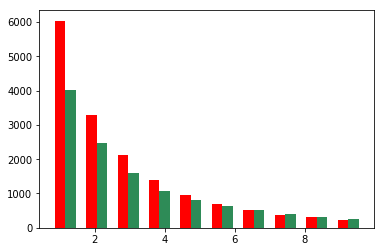

In [158]:

fig, ax = plt.subplots()

a_heights, a_bins = np.histogram(dfNegative['num_nucleus_span'], bins=10, range=(1,10))
b_heights, b_bins = np.histogram(dfPositive['num_nucleus_span'], bins=10, range=(1,10))

width = (a_bins[1] - a_bins[0])/3

ax.bar(a_bins[:-1], a_heights, width=width, facecolor='red')
ax.bar(b_bins[:-1]+width, b_heights, width=width, facecolor='seagreen')

#### Medias

In [159]:
dfPositive["num_nucleus_span"].mean()

4.022162488342751

In [160]:
dfNegative["num_nucleus_span"].mean()

2.594469530171288

#### Medianas

In [161]:
dfPositive["num_nucleus_span"].median()

2.0

In [162]:
dfNegative["num_nucleus_span"].median()

1.0

#### Porcentajes

In [163]:
dfPositive.loc[dfPositive['num_nucleus_span'] > 10, 'num_nucleus_span'] = "> 10"
dfNegative.loc[dfNegative['num_nucleus_span'] > 10, 'num_nucleus_span'] = "> 10"

##### Corpus Negativo

In [164]:
s = dfPositive.num_nucleus_span
counts = s.value_counts()
percent = s.value_counts(normalize=True)
percent100 = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'counts': counts, 'per': percent, 'per100': percent100}).head(10)

,counts,per,per100
0,4328,0.237424,23.7%
1,4018,0.220418,22.0%
2,2479,0.135992,13.6%
> 10,1805,0.099018,9.9%
3,1595,0.087498,8.7%
4,1075,0.058972,5.9%
5,817,0.044819,4.5%
6,634,0.034780,3.5%
7,510,0.027977,2.8%
8,389,0.021340,2.1%


##### Corpus Positivo

In [165]:
s = dfNegative.num_nucleus_span
counts = s.value_counts()
percent = s.value_counts(normalize=True)
percent100 = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'counts': counts, 'per': percent, 'per100': percent100}).head(10)

,counts,per,per100
0,9503,0.354629,35.5%
1,6035,0.225212,22.5%
2,3293,0.122887,12.3%
3,2135,0.079673,8.0%
4,1388,0.051797,5.2%
> 10,1360,0.050752,5.1%
5,958,0.035750,3.6%
6,688,0.025675,2.6%
7,524,0.019554,2.0%
8,365,0.013621,1.4%


### Conteo de las frases 'padre' de satellite

<BarContainer object of 10 artists>

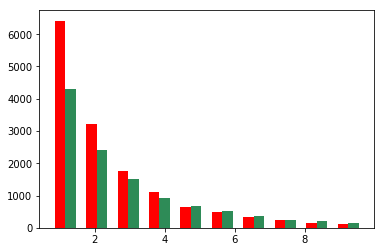

In [166]:
fig, ax = plt.subplots()

a_heights, a_bins = np.histogram(dfNegative['num_satellite_span'], bins=10, range=(1,10))
b_heights, b_bins = np.histogram(dfPositive['num_satellite_span'], bins=10, range=(1,10))

width = (a_bins[1] - a_bins[0])/3

ax.bar(a_bins[:-1], a_heights, width=width, facecolor='red')
ax.bar(b_bins[:-1]+width, b_heights, width=width, facecolor='seagreen')

#### Medias

In [167]:
dfPositive["num_satellite_span"].mean()

2.54599813484009

In [168]:
dfNegative["num_satellite_span"].mean()

1.6537672127476957

#### Medianas

In [169]:
dfPositive["num_satellite_span"].median()

1.0

In [170]:
dfNegative["num_satellite_span"].median()

1.0

#### Porcentajes

In [171]:
dfPositive.loc[dfPositive['num_satellite_span'] > 10, 'num_satellite_span'] = "> 10"
dfNegative.loc[dfNegative['num_satellite_span'] > 10, 'num_satellite_span'] = "> 10"

##### Corpus Negativo

In [172]:
s = dfPositive.num_satellite_span
counts = s.value_counts()
percent = s.value_counts(normalize=True)
percent100 = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'counts': counts, 'per': percent, 'per100': percent100}).head(10)

,counts,per,per100
0,5977,0.327884,32.8%
1,4307,0.236272,23.6%
2,2423,0.132920,13.3%
3,1522,0.083493,8.3%
4,933,0.051182,5.1%
> 10,919,0.050414,5.0%
5,664,0.036425,3.6%
6,508,0.027868,2.8%
7,366,0.020078,2.0%
8,240,0.013166,1.3%


##### Corpus Positivo

In [173]:
s = dfNegative.num_satellite_span
counts = s.value_counts()
percent = s.value_counts(normalize=True)
percent100 = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'counts': counts, 'per': percent, 'per100': percent100}).head(10)

,counts,per,per100
0,11762,0.438930,43.9%
1,6418,0.239504,24.0%
2,3224,0.120312,12.0%
3,1747,0.065194,6.5%
4,1098,0.040975,4.1%
5,660,0.024630,2.5%
> 10,547,0.020413,2.0%
6,479,0.017875,1.8%
7,345,0.012875,1.3%
8,252,0.009404,0.9%
